In [30]:
import os
import tarfile
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy
import gc

In [31]:
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252


In [32]:
data_path = './DATA/EMBRYO_CRE_NEGATIVE'
adata = sc.read_10x_mtx(
    data_path,
    var_names='gene_symbols',
    cache=True
)

In [33]:
adata

AnnData object with n_obs × n_vars = 736217 × 32286
    var: 'gene_ids', 'feature_types'

In [34]:
adata.obs.head()

""
AAACAGCCAAACAACA-1
AAACAGCCAAACATAG-1
AAACAGCCAAACCCTA-1
AAACAGCCAAACCTAT-1
AAACAGCCAAACCTTG-1


In [35]:
adata.X

<736217x32286 sparse matrix of type '<class 'numpy.float32'>'
	with 43640674 stored elements in Compressed Sparse Column format>

In [36]:
non_zero_elements = adata.X.data[:10] if scipy.sparse.issparse(adata.X) else adata.X[np.nonzero(adata.X)][:10]

print("First 10 non-zero elements of adata.X:")
print(non_zero_elements)

First 10 non-zero elements of adata.X:
[2. 1. 1. 4. 3. 2. 1. 1. 1. 1.]


In [37]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [38]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [39]:
adata.var.head()

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,2415,False,2415,0.140715,0.131656,95.890341,8269.0,9.020390
Gm1992,ENSMUSG00000089699,Gene Expression,235,False,235,0.004816,0.004804,99.600095,283.0,5.648974
Gm19938,ENSMUSG00000102331,Gene Expression,464,False,464,0.009887,0.009838,99.210401,581.0,6.366470
Rp1,ENSMUSG00000025900,Gene Expression,27,False,27,0.000936,0.000936,99.954054,55.0,4.025352
Sox17,ENSMUSG00000025902,Gene Expression,67,False,67,0.003029,0.003024,99.885985,178.0,5.187386


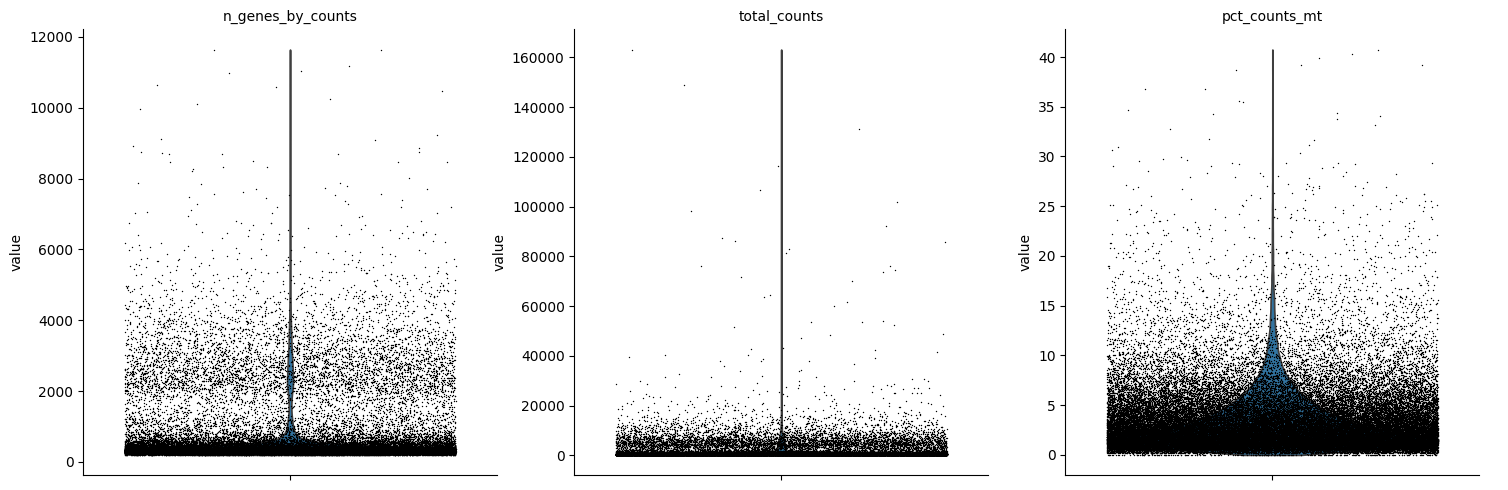

In [40]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [41]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.total_counts < 10000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
gc.collect()

26710

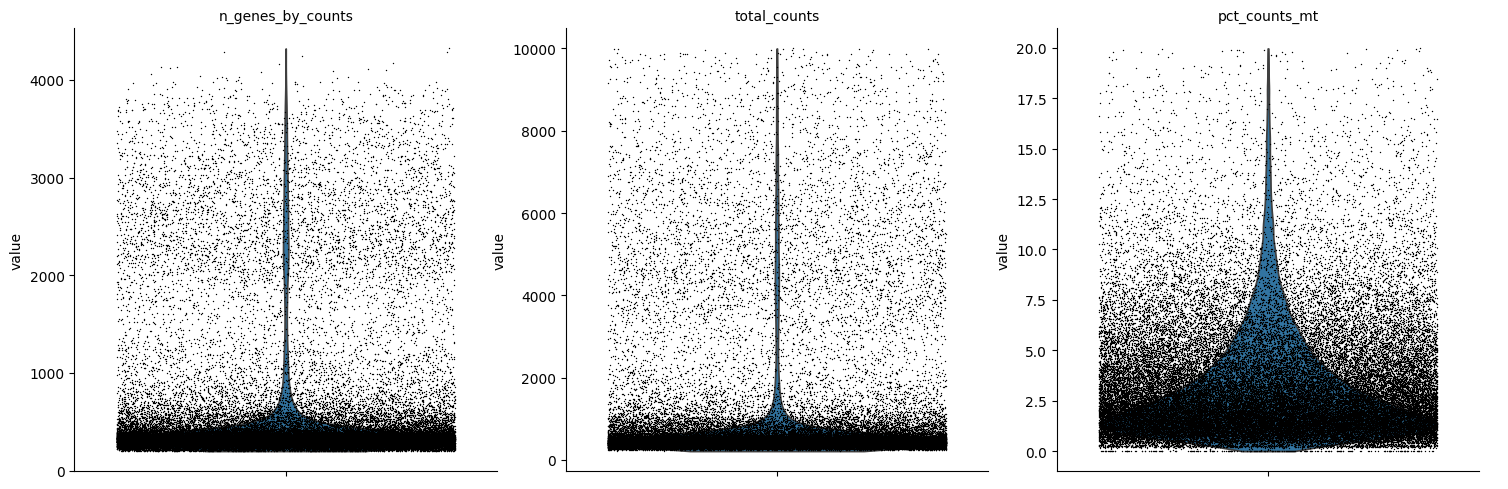

In [42]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [43]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [44]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [45]:
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

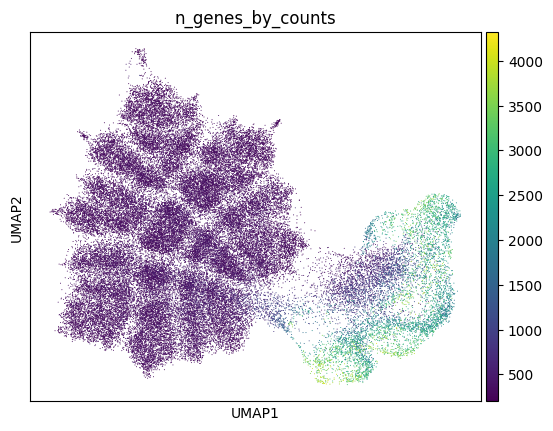

In [46]:
sc.pl.umap(adata, color=['n_genes_by_counts'], wspace=0.4)


In [47]:
adata.write('./output/processed_embryo_cre_negative_data.h5ad')
